# Project: Food Deserts Influence Larceny Rates

#### We are predicting whether or not a community is at risk for higher rates of larceny based on the amount of food deserts per population.

In [1]:
# import starter packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crimedata2.csv') # read csv into pandas

In [3]:
#YASMEEN
#df=pd.read_csv("/Users/macuser/Documents/DTSC3601/crimedata2.csv")

In [4]:
df # glance at dataframe

Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1          23123           2.82          0.80         95.57          3.44   
2          29344           2.43          0.74         94.33          3.43   
3          16656           2.40          1.70         97.35          0.50   
4          11245           2.76          0.53         89.16          1.17   
...          ...            ...           ...           ...           ...   
2210       56216           3.07          6.87         61.68         15.23   
2211       12251           2.68         21.18         76.65          1.52   
2212       32824           2.46          0.52         92.62          0.98   
2213       13547           2.89          3.37         69.91          0.90   
2214       28898           2.61          2.39         71.27          9.09   

      ...  burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  \
0     ...          14       114.85        138     1132.08         16   
1     ...          57       242.37        376     1598.78         26   
2     ...         274       758.14       1797     4972.19        136   
3     ...         225      1301.78        716     4142.56         47   
4     ...          91       728.93       1060     8490.87         91   
...   ...         ...          ...        ...         ...        ...   
2210  ...        1376      2268.72       2563     4225.82        489   
2211  ...         104       860.43        574      4748.9         24   
2212  ...         628      1709.26        895     2435.97        179   
2213  ...         192      1508.01        474      3722.9         13   
2214  ...         791      2614.53       1458      4819.2        405   

      autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  \
0              131.26       2         16.41                41.02   
1              110.55       1          4.25               127.56   
2               376.3      22         60.87               218.59   
3              271.93       ?             ?               306.64   
4              728.93       5         40.05                    ?   
...               ...     ...           ...                  ...   
2210           806.25      34         56.06               545.75   
2211           198.56       2         16.55                124.1   
2212           487.19       8         21.77               353.83   
2213            102.1       1          7.85               691.17   
2214          1338.67      20         66.11               918.89   

      nonViolPerPop  
0           1394.59  
1           1955.95  
2           6167.51  
3                 ?  
4           9988.79  
...             ...  
2210        7356.84  
2211        5824.44  
2212         4654.2  
2213        5340.87  
2214         8838.5  

[2215 rows x 147 columns]

In [5]:
df.shape # number of (rows, columns)

(2215, 147)

In [6]:
df.describe() # count, max, min, std, mean

fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623     6.181517     5.970747  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.620000     0.930000    12.250000    24.415000    11.320000  ...   
50%        1.230000     2.180000    13.620000    26.780000    12.540000  ...   
75%        2.670000     7.810000    15.360000    29.205000    14.345000  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count       2215.000000     2215.000000    2215.000000     2215.000000   
mean          61.539630       51.538596      77.411079       88.111865   
std           16.750061       10.517926      10.878186        7.287836   
min            6.750000       11.830000      27.950000       32.830000   
25%           50.110000       44.995000      72.060000       85.200000   
50%           64.490000       52.170000      79.490000       90.030000   
75%           74.855000       58.740000      85.135000       93.010000   
max           93.140000       78.560000      96.590000       99.900000   

          LandArea       PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  2215.000000   2215.000000     2215.000000          2215.000000   
mean     27.419955   2783.835034        3.041124             0.980163   
std     109.822600   2828.993341        4.912917             2.877128   
min       0.900000     10.000000        0.000000             0.000000   
25%       7.300000   1181.900000        0.360000             0.000000   
50%      13.700000   2027.300000        1.220000             0.000000   
75%      26.100000   3321.700000        3.365000             0.000000   
max    3569.800000  44229.900000       54.330000            48.440000   

           murders   murdPerPop  
count  2215.000000  2215.000000  
mean      7.764786     5.859296  
std      58.166468     9.156829  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     2.170000  
75%       3.000000     8.365000  
max    1946.000000    91.090000  

[8 rows x 104 columns]

In [7]:
# Make list of columns to remove
columns_to_remove = [
# Race variables
'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'whitePerCap',
'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'RacialMatchCommPol',
# Crime-related variables
'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop',
'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'autoTheft',
'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop',
# Gender-related variables
'MalePctNevMarr', 
# Police-related variables
'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'PctPolicWhite', 'PctPolicBlack',
'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
'LemasPctOfficDrugUn', 'PolicBudgPerPop'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Display the remaining columns to verify
print("Remaining columns after removal:")
print(df.columns)

Remaining columns after removal:
Index(['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv',
       'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctN

In [8]:
df.isna().sum() # sum of all null values in each column

Êcommunityname    0
state             0
countyCode        0
communityCode     0
fold              0
                 ..
LandArea          0
PopDens           0
PctUsePubTrans    0
larcenies         0
larcPerPop        0
Length: 97, dtype: int64

WHY is that zero for nearly every column???????

In [9]:
df.head()

Êcommunityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR          ?             ?     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  agePct12t21  agePct12t29  agePct16t24  ...  PctForeignBorn  \
0           3.10        12.47        21.44        10.93  ...           10.66   
1           2.82        11.01        21.30        10.48  ...            8.30   
2           2.43        11.36        25.88        11.01  ...            5.00   
3           2.40        12.55        25.20        12.19  ...            2.04   
4           2.76        24.46        40.53        28.69  ...            1.74   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0             53.72           65.29          78.09           89.14       6.5   
1             77.17           71.27          90.22           96.12      10.6   
2             44.77           36.60          61.26           82.85      10.6   
3             88.71           56.70          90.17           96.24       5.2   
4             73.75           42.22          60.34           89.02      11.5   

   PopDens  PctUsePubTrans  larcenies  larcPerPop  
0   1845.9            9.63        138     1132.08  
1   2186.7            3.84        376     1598.78  
2   2780.9            4.37       1797     4972.19  
3   3217.7            3.31        716     4142.56  
4    974.2            0.38       1060     8490.87  

[5 rows x 97 columns]

Oh, it is because nearly every missing item is a '?' instead of a null value, lets fix that!

In [10]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [11]:
df.dtypes # data types of each column

Êcommunityname     object
state              object
countyCode         object
communityCode      object
fold                int64
                   ...   
LandArea          float64
PopDens           float64
PctUsePubTrans    float64
larcenies          object
larcPerPop         object
Length: 97, dtype: object

In [12]:
# viewing all columns with their datatypes as a list of tuples
data_types = [(col, df[col].dtype) for col in df.columns]

# print the list of column names with their datatypes
for col, dtype in data_types:
    print(f"{col}: {dtype}")

Êcommunityname: object
state: object
countyCode: object
communityCode: object
fold: int64
population: int64
householdsize: float64
agePct12t21: float64
agePct12t29: float64
agePct16t24: float64
agePct65up: float64
numbUrban: int64
pctUrban: float64
medIncome: int64
pctWWage: float64
pctWFarmSelf: float64
pctWInvInc: float64
pctWSocSec: float64
pctWPubAsst: float64
pctWRetire: float64
medFamInc: int64
perCapInc: int64
NumUnderPov: int64
PctPopUnderPov: float64
PctLess9thGrade: float64
PctNotHSGrad: float64
PctBSorMore: float64
PctUnemployed: float64
PctEmploy: float64
PctEmplManu: float64
PctEmplProfServ: float64
PctOccupManu: float64
PctOccupMgmtProf: float64
MalePctDivorce: float64
FemalePctDiv: float64
TotalPctDiv: float64
PersPerFam: float64
PctFam2Par: float64
PctKids2Par: float64
PctYoungKids2Par: float64
PctTeen2Par: float64
PctWorkMomYoungKids: float64
PctWorkMom: float64
NumKidsBornNeverMar: int64
PctKidsBornNeverMar: float64
NumImmig: int64
PctImmigRecent: float64
PctImmigRec5

In [13]:
# List of columns to convert to numeric
columns_to_convert = [
    'larcenies', 'larcPerPop'
]

In [14]:
# Convert these columns to numeric, forcing invalid values to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

# make sure the conversion worked
print(df[columns_to_convert].dtypes)

larcenies     float64
larcPerPop    float64
dtype: object


In [15]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
countyCode: 1221
communityCode: 1224
fold: 0
population: 0
householdsize: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRentOccHous: 0
PctP

In [16]:
percent_null = 40.0
min_count =  int(((100-percent_null)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [17]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRentOccHous: 0
PctPersOwnOccup: 0
PctPersDenseHous: 0
Pc

In [18]:
# Come back to this
mean_values = df.mean(numeric_only=True)

df_filled = df.fillna(mean_values)

df = df_filled

In [19]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRentOccHous: 0
PctPersOwnOccup: 0
PctPersDenseHous: 0
Pc

In [20]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")  # prints bins in each column and number of items in each bin

Êcommunityname:
 Auburncity            5
Greenvillecity        5
Jacksonvillecity      5
Springfieldcity       5
Albanycity            4
                     ..
Lackawannacity        1
LincolnParkborough    1
Keizercity            1
TarponSpringscity     1
WestSacramentocity    1
Name: Êcommunityname, Length: 2018, dtype: int64

state:
 CA    279
NJ    211
TX    162
MA    123
OH    111
MI    108
PA    101
FL     90
CT     71
MN     66
WI     60
IN     48
NC     46
NY     46
AL     43
MO     42
WA     40
IL     40
GA     37
OK     36
TN     35
VA     33
OR     31
SC     28
RI     26
KY     26
CO     25
AR     25
UT     24
LA     22
NH     21
IA     20
MS     20
AZ     20
ME     17
WV     14
MD     12
NM     10
SD      9
ND      8
WY      7
ID      7
NV      5
VT      4
AK      3
KS      1
DE      1
DC      1
Name: state, dtype: int64

fold:
 1     222
2     222
3     222
4     222
5     222
6     221
7     221
8     221
9     221
10    221
Name: fold, dtype: int64

population:
 12361   

In [21]:
df.columns.tolist() # list of total columns for reference since .columns only shows so many

['Êcommunityname',
 'state',
 'fold',
 'population',
 'householdsize',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctLargHouseFam',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'Per

In [22]:
df.describe()

fold    population  householdsize  agePct12t21  agePct12t29  \
count  2215.000000  2.215000e+03    2215.000000  2215.000000  2215.000000   
mean      5.494357  5.311798e+04       2.707327    14.445837    27.644840   
std       2.872924  2.046203e+05       0.334120     4.518623     6.181517   
min       1.000000  1.000500e+04       1.600000     4.580000     9.380000   
25%       3.000000  1.436600e+04       2.500000    12.250000    24.415000   
50%       5.000000  2.279200e+04       2.660000    13.620000    26.780000   
75%       8.000000  4.302400e+04       2.850000    15.360000    29.205000   
max      10.000000  7.322564e+06       5.280000    54.400000    70.510000   

       agePct16t24   agePct65up     numbUrban     pctUrban      medIncome  \
count  2215.000000  2215.000000  2.215000e+03  2215.000000    2215.000000   
mean     13.975142    11.836393  4.773472e+04    70.465309   33984.696163   
std       5.970747     4.777565  2.056067e+05    44.080275   13424.680011   
min       4.640000     1.660000  0.000000e+00     0.000000    8866.000000   
25%      11.320000     8.750000  0.000000e+00     0.000000   23817.000000   
50%      12.540000    11.730000  1.804100e+04   100.000000   31441.000000   
75%      14.345000    14.415000  4.191800e+04   100.000000   41480.500000   
max      63.620000    52.770000  7.322564e+06   100.000000  123625.000000   

       ...  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
count  ...     2215.000000       2215.000000     2215.000000    2215.000000   
mean   ...        7.340302         61.539630       51.538596      77.411079   
std    ...        8.418476         16.750061       10.517926      10.878186   
min    ...        0.180000          6.750000       11.830000      27.950000   
25%    ...        2.060000         50.110000       44.995000      72.060000   
50%    ...        4.310000         64.490000       52.170000      79.490000   
75%    ...        9.250000         74.855000       58.740000      85.135000   
max    ...       60.400000         93.140000       78.560000      96.590000   

       PctSameState85     LandArea       PopDens  PctUsePubTrans  \
count     2215.000000  2215.000000   2215.000000     2215.000000   
mean        88.111865    27.419955   2783.835034        3.041124   
std          7.287836   109.822600   2828.993341        4.912917   
min         32.830000     0.900000     10.000000        0.000000   
25%         85.200000     7.300000   1181.900000        0.360000   
50%         90.030000    13.700000   2027.300000        1.220000   
75%         93.010000    26.100000   3321.700000        3.365000   
max         99.900000  3569.800000  44229.900000       54.330000   

           larcenies    larcPerPop  
count    2215.000000   2215.000000  
mean     2137.629295   3372.979150  
std      7595.422279   1900.027554  
min        10.000000     77.860000  
25%       392.500000   2040.740000  
50%       748.000000   3081.630000  
75%      1676.500000   4334.675000  
max    235132.000000  25910.550000  

[8 rows x 93 columns]

## Correlations (Positive and Negative)

In [23]:
# Create a heatmap starting at the 5th index
df_subset = df.iloc[5:]

# Correlation
plt.figure(figsize=(100,100))
sns.heatmap(df_subset.corr(numeric_only=True),annot=True)
plt.title('Correlation of Attributes')
plt.show()

In [24]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['larcPerPop'].sort_values(ascending=False)
print(correlation_with_target.head(25)) # top 25 variables correlated to larcPerPop

larcPerPop             1.000000
TotalPctDiv            0.525188
MalePctDivorce         0.514170
FemalePctDiv           0.511368
PctPopUnderPov         0.452417
PctHousNoPhone         0.450435
PctKidsBornNeverMar    0.409319
PctHousLess3BR         0.389260
pctWPubAsst            0.353609
PctUnemployed          0.293820
PctNotHSGrad           0.287266
PctImmigRec10          0.234904
PctVacantBoarded       0.226246
PctLess9thGrade        0.221941
PctImmigRec8           0.212130
PctOccupManu           0.193128
PctImmigRec5           0.189110
PctWOFullPlumb         0.182142
pctWSocSec             0.174515
larcenies              0.174193
PctImmigRecent         0.169467
MedRentPctHousInc      0.150451
agePct65up             0.145530
HousVacant             0.123576
PctPersDenseHous       0.118873
Name: larcPerPop, dtype: float64


In [25]:
print(correlation_with_target.tail(25)) # top negatively correlated variables to larcPerPop

PctOccupMgmtProf    -0.249182
PctHousOccup        -0.263105
PersPerOccupHous    -0.264056
PctEmploy           -0.277274
RentQrange          -0.279891
pctWWage            -0.306484
OwnOccHiQuart       -0.307836
perCapInc           -0.309160
OwnOccMedVal        -0.320958
PersPerOwnOccHous   -0.321699
MedNumBR            -0.324523
OwnOccLowQuart      -0.334841
RentLowQ            -0.356627
RentMedian          -0.375966
RentHighQ           -0.377599
MedRent             -0.382933
pctWInvInc          -0.386698
PctHousOwnOcc       -0.393558
PctPersOwnOccup     -0.420521
medFamInc           -0.435318
medIncome           -0.454502
PctTeen2Par         -0.509333
PctYoungKids2Par    -0.516231
PctKids2Par         -0.544812
PctFam2Par          -0.549538
Name: larcPerPop, dtype: float64


# Outliers

In [26]:
df.head(10)

Êcommunityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   
5          Springfieldcity    MO     1      140494           2.45   
6              Norwoodtown    MA     1       28700           2.60   
7             Andersoncity    IN     1       59459           2.45   
8                Fargocity    ND     1       74111           2.46   
9                 Wacocity    TX     1      103590           2.62   

   agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  ...  \
0        12.47        21.44        10.93       11.33      11980  ...   
1        11.01        21.30        10.48       17.18      23123  ...   
2        11.36        25.88        11.01       10.28      29344  ...   
3        12.55        25.20        12.19       17.57          0  ...   
4        24.46        40.53        28.69       12.65          0  ...   
5        18.09        32.89        20.04       13.26     140494  ...   
6        11.17        27.41        12.76       14.42      28700  ...   
7        15.31        27.93        14.78       14.60      59449  ...   
8        16.64        35.16        20.33        8.58      74115  ...   
9        19.88        34.55        21.62       13.12     103590  ...   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0           10.66             53.72           65.29          78.09   
1            8.30             77.17           71.27          90.22   
2            5.00             44.77           36.60          61.26   
3            2.04             88.71           56.70          90.17   
4            1.74             73.75           42.22          60.34   
5            1.49             64.35           42.29          70.61   
6            9.19             77.30           63.45          82.23   
7            0.87             73.70           54.85          85.55   
8            1.99             58.82           40.72          67.97   
9            4.63             75.59           42.33          74.05   

   PctSameState85  LandArea  PopDens  PctUsePubTrans  larcenies  larcPerPop  
0           89.14       6.5   1845.9            9.63      138.0     1132.08  
1           96.12      10.6   2186.7            3.84      376.0     1598.78  
2           82.85      10.6   2780.9            4.37     1797.0     4972.19  
3           96.24       5.2   3217.7            3.31      716.0     4142.56  
4           89.02      11.5    974.2            0.38     1060.0     8490.87  
5           85.66      70.4   1995.7            0.97     7690.0     5091.64  
6           93.53      10.9   2643.5            9.62      288.0      974.19  
7           91.51      39.2   1515.3            0.70     2250.0     3691.79  
8           81.39      30.9   2399.3            1.41     3149.0     3946.71  
9           92.12      78.5   1319.3            0.76     6121.0     5673.63  

[10 rows x 95 columns]

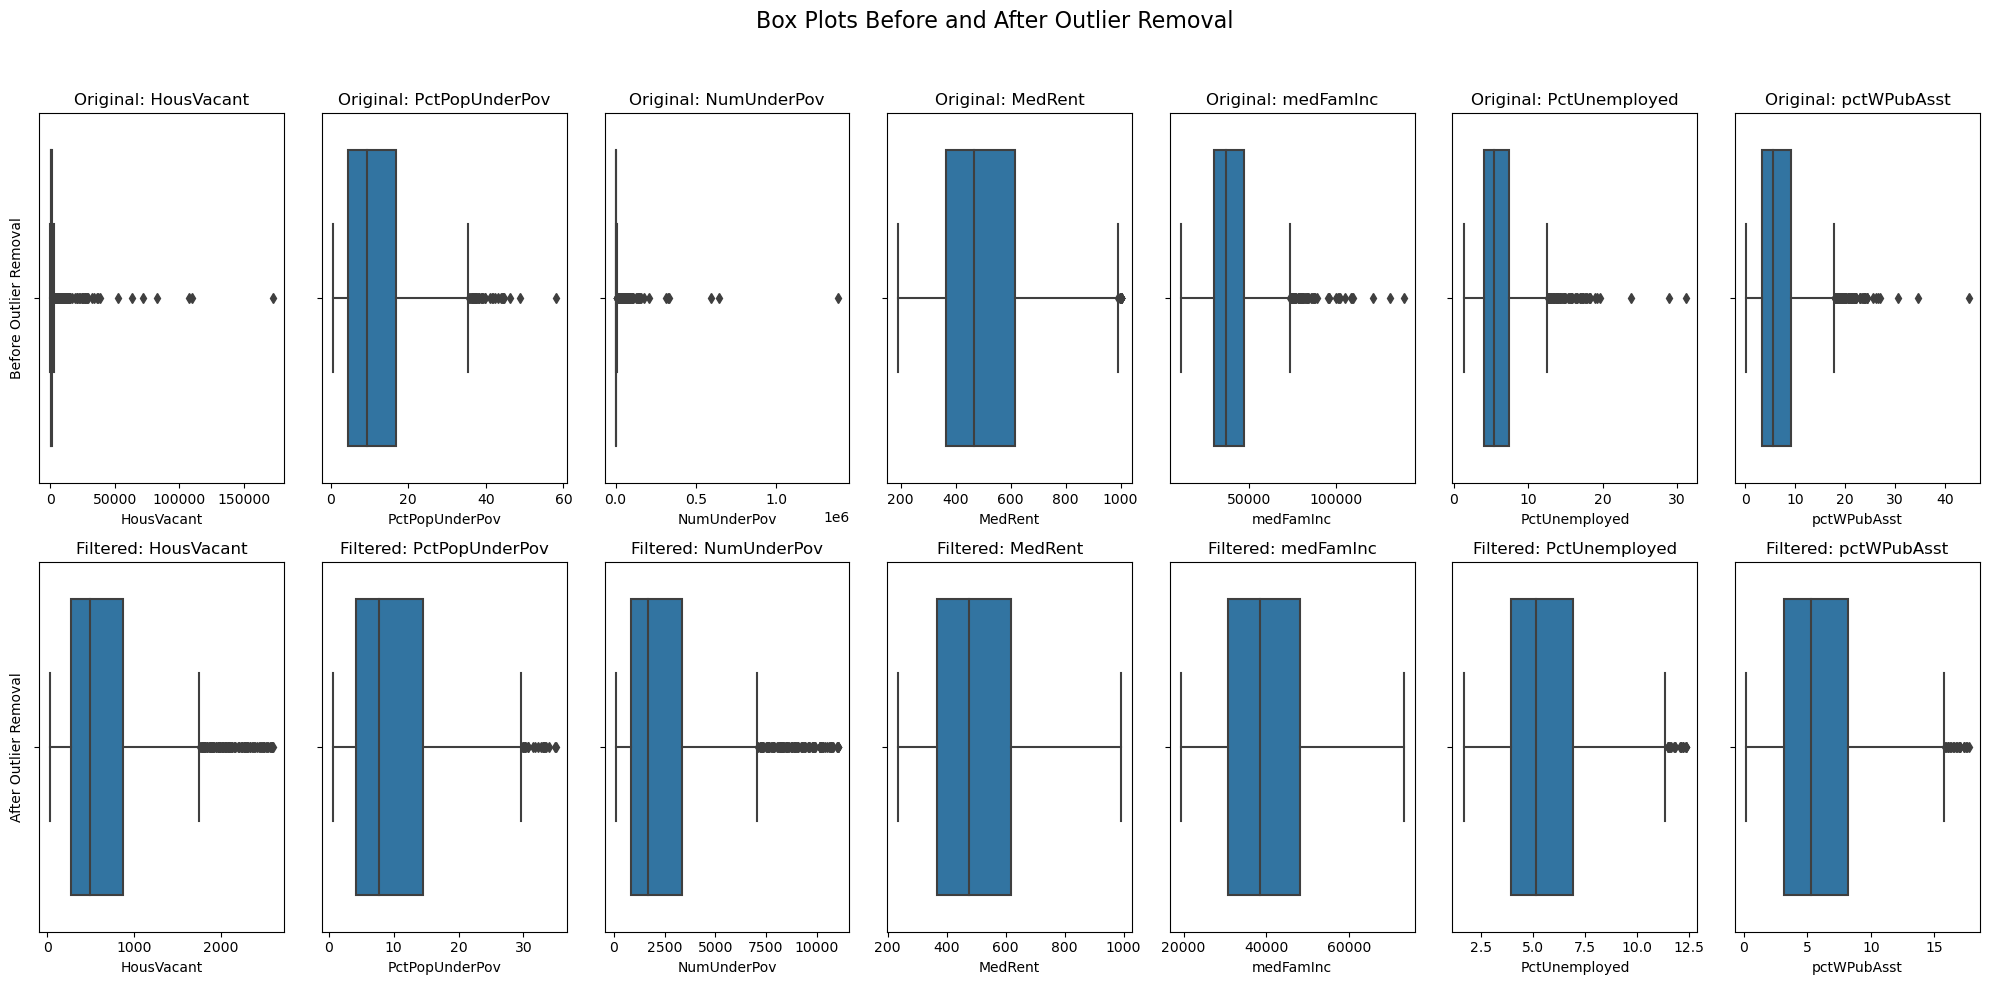

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns = ['HousVacant', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst']

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(20, 10))
fig.suptitle("Box Plots Before and After Outlier Removal", fontsize=16)

# Box plots for original data
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[0, i])
    axes[0, i].set_title(f'Original: {col}')

# Create a copy of the original DataFrame for outlier removal
df_filtered = df.copy()

# Apply IQR filtering with custom multipliers if needed
multiplier = 1.5  # Adjust the multiplier (use a lower value to decrease the cutoff)
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

# Box plots for filtered data
for i, col in enumerate(columns):
    sns.boxplot(data=df_filtered, x=col, ax=axes[1, i])
    axes[1, i].set_title(f'Filtered: {col}')

axes[0, 0].set_ylabel("Before Outlier Removal")
axes[1, 0].set_ylabel("After Outlier Removal")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [28]:
df=df_filtered

# Sklearn Feature Importance

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# define target and features
X = df.drop(columns=['larcPerPop', 'Êcommunityname', 'state']) # drop target column and columns with strings
y = df['larcPerPop'] # target column

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
importances = rf.feature_importances_.argsort()

feature_names = X.columns

In [34]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

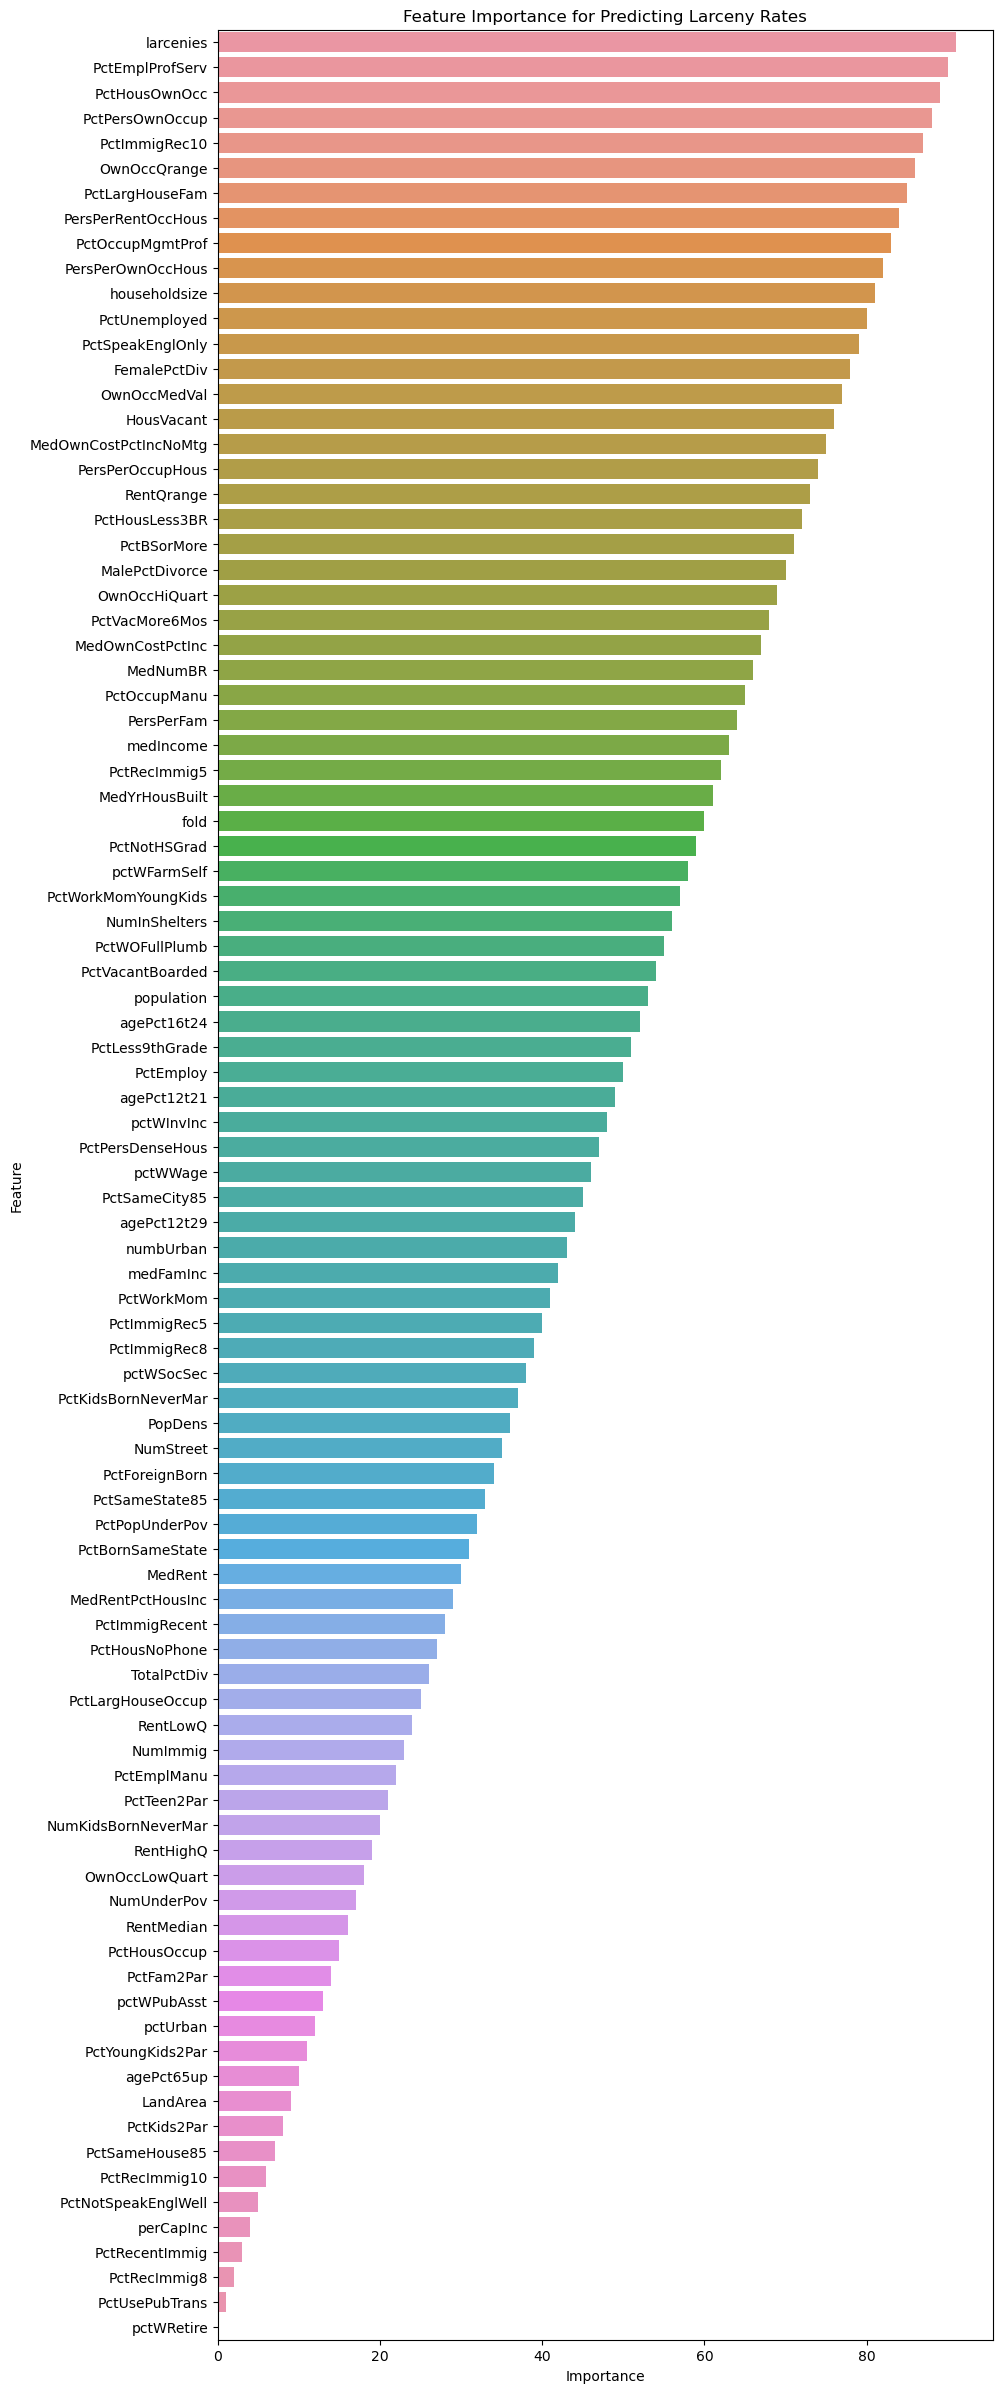

In [35]:
# Plot feature importance
plt.figure(figsize=(10,30))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Larceny Rates')
plt.show()

# New Column: PctLarcPerPop

In [36]:
df['PctLarcPerPop'] = (df['larcPerPop'] / df['population']) * 100 #Creates a new column that divides larcPerPop by Population

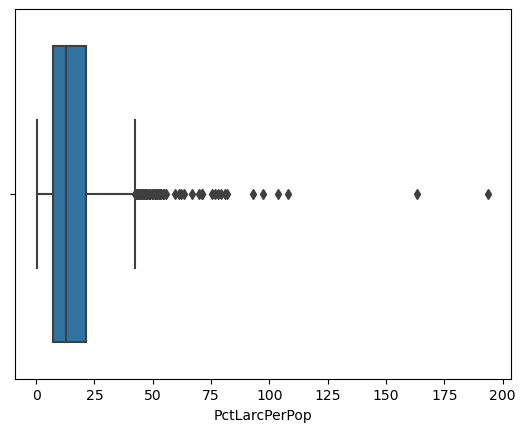

In [37]:
sns.boxplot(x=df['PctLarcPerPop'])
plt.show() 

#Code to create a boxplot for the new variable created

In [38]:
df.head(5)

Êcommunityname state  fold  population  householdsize  agePct12t21  \
1    Marpletownship    PA     1       23123           2.82        11.01   
2        Tigardcity    OR     1       29344           2.43        11.36   
3  Gloversvillecity    NY     1       16656           2.40        12.55   
4       Bemidjicity    MN     1       11245           2.76        24.46   
6       Norwoodtown    MA     1       28700           2.60        11.17   

   agePct12t29  agePct16t24  agePct65up  numbUrban  ...  PctBornSameState  \
1        21.30        10.48       17.18      23123  ...             77.17   
2        25.88        11.01       10.28      29344  ...             44.77   
3        25.20        12.19       17.57          0  ...             88.71   
4        40.53        28.69       12.65          0  ...             73.75   
6        27.41        12.76       14.42      28700  ...             77.30   

   PctSameHouse85  PctSameCity85  PctSameState85  LandArea  PopDens  \
1           71.27          90.22           96.12      10.6   2186.7   
2           36.60          61.26           82.85      10.6   2780.9   
3           56.70          90.17           96.24       5.2   3217.7   
4           42.22          60.34           89.02      11.5    974.2   
6           63.45          82.23           93.53      10.9   2643.5   

   PctUsePubTrans  larcenies  larcPerPop  PctLarcPerPop  
1            3.84      376.0     1598.78       6.914241  
2            4.37     1797.0     4972.19      16.944486  
3            3.31      716.0     4142.56      24.871278  
4            0.38     1060.0     8490.87      75.507959  
6            9.62      288.0      974.19       3.394390  

[5 rows x 96 columns]

In [39]:
df['PctLarcPerPop'].describe()

count    1752.000000
mean       16.189534
std        13.635269
min         0.571989
25%         7.227074
50%        12.620712
75%        21.301038
max       193.839680
Name: PctLarcPerPop, dtype: float64

In [40]:
model_df = df[['HousVacant', 'PctLarcPerPop', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst']]

In [41]:
model_df.head()

HousVacant  PctLarcPerPop  PctPopUnderPov  NumUnderPov  MedRent  medFamInc  \
1         240       6.914241            3.98          885      627      55323   
2         544      16.944486            4.75         1389      484      42112   
3         669      24.871278           17.23         2831      333      26501   
4         333      75.507959           29.99         2855      332      24018   
6         566       3.394390            4.01         1126      736      50394   

   PctUnemployed  pctWPubAsst  
1           2.43         2.75  
2           4.01         2.94  
3           9.86        11.71  
4           9.08        11.21  
6           4.85         5.41

In [42]:
# Over 20.24% larc per pop is considered high risk since 75% of data falls below
category = pd.cut(model_df.PctLarcPerPop,bins=[0,5.90,20.06,194],labels=['Low-Risk','Medium-Risk','High-Risk'])

In [43]:
model_df.insert(8,'PctLarcPerPopRisk',category)

In [44]:
model_df = model_df.drop(columns='PctLarcPerPop', axis=1)

In [45]:
model_df.dropna(how='any')

HousVacant  PctPopUnderPov  NumUnderPov  MedRent  medFamInc  \
1            240            3.98          885      627      55323   
2            544            4.75         1389      484      42112   
3            669           17.23         2831      333      26501   
4            333           29.99         2855      332      24018   
6            566            4.01         1126      736      50394   
...          ...             ...          ...      ...        ...   
2208         950           14.46         1845      263      29144   
2209         126            4.33          458      651      44587   
2211         523           20.79         2364      330      25000   
2212         957            7.56         2460      514      34973   
2213         802           30.32         4021      316      22103   

      PctUnemployed  pctWPubAsst PctLarcPerPopRisk  
1              2.43         2.75       Medium-Risk  
2              4.01         2.94       Medium-Risk  
3              9.86        11.71         High-Risk  
4              9.08        11.21         High-Risk  
6              4.85         5.41          Low-Risk  
...             ...          ...               ...  
2208           5.88         7.36         High-Risk  
2209           4.13         5.43       Medium-Risk  
2211           7.90         8.85         High-Risk  
2212           5.18         9.01       Medium-Risk  
2213          12.12        13.05         High-Risk  

[1752 rows x 8 columns]

In [46]:
model_df['PctLarcPerPopRisk'].value_counts()

Medium-Risk    950
High-Risk      491
Low-Risk       311
Name: PctLarcPerPopRisk, dtype: int64

In [47]:
model_df.dtypes

HousVacant              int64
PctPopUnderPov        float64
NumUnderPov             int64
MedRent                 int64
medFamInc               int64
PctUnemployed         float64
pctWPubAsst           float64
PctLarcPerPopRisk    category
dtype: object

In [48]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
dtype: int64

In [49]:
model_df.dropna()

HousVacant  PctPopUnderPov  NumUnderPov  MedRent  medFamInc  \
1            240            3.98          885      627      55323   
2            544            4.75         1389      484      42112   
3            669           17.23         2831      333      26501   
4            333           29.99         2855      332      24018   
6            566            4.01         1126      736      50394   
...          ...             ...          ...      ...        ...   
2208         950           14.46         1845      263      29144   
2209         126            4.33          458      651      44587   
2211         523           20.79         2364      330      25000   
2212         957            7.56         2460      514      34973   
2213         802           30.32         4021      316      22103   

      PctUnemployed  pctWPubAsst PctLarcPerPopRisk  
1              2.43         2.75       Medium-Risk  
2              4.01         2.94       Medium-Risk  
3              9.86        11.71         High-Risk  
4              9.08        11.21         High-Risk  
6              4.85         5.41          Low-Risk  
...             ...          ...               ...  
2208           5.88         7.36         High-Risk  
2209           4.13         5.43       Medium-Risk  
2211           7.90         8.85         High-Risk  
2212           5.18         9.01       Medium-Risk  
2213          12.12        13.05         High-Risk  

[1752 rows x 8 columns]

In [50]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
dtype: int64

In [51]:
# Convert the 'PctLarcPerPopRisk' column to string
model_df['PctLarcPerPopRisk'] = model_df['PctLarcPerPopRisk'].astype(str)

# Dummy Model (Baseline)

In [52]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [53]:
# define feature set and target set
X = model_df.drop(columns = ['PctLarcPerPopRisk']) # features used to predict class
y = model_df['PctLarcPerPopRisk'] # what we are trying to predict

In [54]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [55]:
dummy_clf.predict(X)

array(['Medium-Risk', 'Medium-Risk', 'Medium-Risk', ..., 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk'], dtype='<U11')

In [56]:
dummy_clf.score(X, y)

0.5422374429223744

# Model 1- Decision Tree Classifier

In [57]:
# define feature set and target set
X = model_df.drop(columns = ['PctLarcPerPopRisk']) # features used to predict class
y = model_df['PctLarcPerPopRisk'] # what we are trying to predict

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# perform train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 ) #80% train, 20% test

In [60]:
# print shape to see how many in train/test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1226, 7) (526, 7) (1226,) (526,)


In [61]:
from sklearn import tree

In [62]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [63]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
dtype: int64

In [64]:
clf = clf.fit(X_train, y_train) #fit training data to the model

## Model 1 Evaluation

In [65]:
from sklearn import metrics
import numpy as np

In [66]:
#predict values from X_test
predicted = clf.predict(X_test)

In [67]:
predicted

array(['Low-Risk', 'Low-Risk', 'Low-Risk', 'Medium-Risk', 'Low-Risk',
       'Low-Risk', 'High-Risk', 'Medium-Risk', 'Low-Risk', 'Low-Risk',
       'High-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Low-Risk', 'Medium-Risk', 'High-Risk', 'High-Risk', 'Medium-Risk',
       'Low-Risk', 'Low-Risk', 'Medium-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'High-Risk', 'High-Risk', 'Low-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Low-Risk', 'Medium-Risk',
       'Low-Risk', 'Medium-Risk', 'High-Risk', 'Low-Risk', 'Medium-Risk',
       'Medium-Risk', 'Low-Risk', 'High-Risk', 'High-Risk', 'Low-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'High-Risk', 'Low-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'High-Risk',
       'Medium-Risk', 'Medium-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk

In [68]:
clf.score(X_test, y_test)

0.6102661596958175

In [69]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   High-Risk       0.64      0.50      0.56       159
    Low-Risk       0.50      0.69      0.58        87
 Medium-Risk       0.64      0.65      0.65       280

    accuracy                           0.61       526
   macro avg       0.59      0.61      0.60       526
weighted avg       0.62      0.61      0.61       526



# Model 2- Decision Tree C5.0

## Iterating through max_leaf_nodes and evaluating different parameters

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [71]:
# iterate through different max_leaf_nodes values (from 5 to 20)
for leaf_nodes in range(5, 21):
    print(f"Evaluating model with max_leaf_nodes = {leaf_nodes}")
    
    # initialize and train model with current max_leaf_nodes variable
    clf50 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=leaf_nodes)
    clf50.fit(X_train, y_train)
    
    # make predictions on test set
    pred_clf50 = clf50.predict(X_test)
    
    # print the classification report for each model iteration
    print(f"Classification Report for max_leaf_nodes = {leaf_nodes}:\n")
    print(classification_report(y_test, pred_clf50))
   
    # separate each iteration's output so we can differentiate
    print("-" * 60)

Evaluating model with max_leaf_nodes = 5
Classification Report for max_leaf_nodes = 5:

              precision    recall  f1-score   support

   High-Risk       0.71      0.28      0.40       159
    Low-Risk       0.77      0.26      0.39        87
 Medium-Risk       0.59      0.92      0.72       280

    accuracy                           0.62       526
   macro avg       0.69      0.49      0.50       526
weighted avg       0.66      0.62      0.57       526

------------------------------------------------------------
Evaluating model with max_leaf_nodes = 6
Classification Report for max_leaf_nodes = 6:

              precision    recall  f1-score   support

   High-Risk       0.71      0.28      0.40       159
    Low-Risk       0.62      0.43      0.50        87
 Medium-Risk       0.60      0.86      0.70       280

    accuracy                           0.61       526
   macro avg       0.64      0.52      0.54       526
weighted avg       0.63      0.61      0.58       526

-

From looking through all the iterations, it seems that the model with max_leaf_nodes=11 has the best accuracy overall, and every other leaf node added after it seems to stay at around 66% accuracy. Better than the dummy!

# Model 3- Decision Tree CART

In [72]:
cart01=DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)

In [73]:
cart01.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

In [74]:
pred=cart01.predict(X_test) 

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   High-Risk       0.71      0.28      0.40       159
    Low-Risk       0.77      0.26      0.39        87
 Medium-Risk       0.59      0.92      0.72       280

    accuracy                           0.62       526
   macro avg       0.69      0.49      0.50       526
weighted avg       0.66      0.62      0.57       526



# Model 4- Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_n_estimators = 1
best_accuracy = 0
best_pred_rf = None  # Store predictions of the best model

# Iterate through n_estimators values from 1 to 100
for n_estimators in range(1, 101):
    # Initialize and train model with current n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion="gini").fit(X_train, y_train)
    
    # Make predictions on test set
    pred_rf = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy_rf_test = accuracy_score(y_test, pred_rf)
    
    # Update best n_estimators if current model has better accuracy
    if accuracy_rf_test > best_accuracy:
        best_accuracy = accuracy_rf_test
        best_n_estimators = n_estimators
        best_pred_rf = pred_rf  # Save the predictions for the best model

# Print the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred_rf))


Best n_estimators: 62, with Accuracy: 0.6901
              precision    recall  f1-score   support

   High-Risk       0.74      0.55      0.63       159
    Low-Risk       0.67      0.49      0.57        87
 Medium-Risk       0.68      0.83      0.74       280

    accuracy                           0.69       526
   macro avg       0.70      0.63      0.65       526
weighted avg       0.69      0.69      0.68       526



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_n_estimators = 1
best_accuracy = 0
best_pred_rf = None  # Store predictions of the best model

# Iterate through n_estimators values from 1 to 100
for n_estimators in range(1, 101):
    # Initialize and train model with current n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy").fit(X_train, y_train)
    
    # Make predictions on test set
    pred_rf = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy_rf_test = accuracy_score(y_test, pred_rf)
    
    # Update best n_estimators if current model has better accuracy
    if accuracy_rf_test > best_accuracy:
        best_accuracy = accuracy_rf_test
        best_n_estimators = n_estimators
        best_pred_rf = pred_rf  # Save the predictions for the best model

# Print the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred_rf))


Best n_estimators: 73, with Accuracy: 0.6977
              precision    recall  f1-score   support

   High-Risk       0.74      0.55      0.63       159
    Low-Risk       0.69      0.53      0.60        87
 Medium-Risk       0.68      0.84      0.75       280

    accuracy                           0.70       526
   macro avg       0.70      0.64      0.66       526
weighted avg       0.70      0.70      0.69       526



# Model 5- Linear Regression

#### This is using 'PctLarcPerPop' as the target variable in order to have a continuous variable instead of a categorical one. 

In [93]:
# Import necessary libraries for regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

In [94]:
lr_df = df[['HousVacant', 'PctLarcPerPop', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst']]

In [95]:
X = lr_df.drop(columns=['PctLarcPerPop'])  # Dropping target variable from features
y = lr_df['PctLarcPerPop']

In [96]:
# Instantiate the linear regression model
lr = LinearRegression()

# define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [97]:
# R-squared scores across the 5 folds
r2_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')

# MSE and RMSE across folds using make_scorer
mse_scores = cross_val_score(lr, X, y, cv=kf, scoring=make_scorer(mean_squared_error))
rmse_scores = np.sqrt(mse_scores)  # RMSE is the square root of MSE


In [101]:
# Print the results for each metric
print(f'\nR-squared scores for each fold: {r2_scores}')
print(f'Highest R-squared: {np.max(r2_scores)}')
print(f'Average R-squared: {np.mean(r2_scores)}')

print(f'\nMSE scores for each fold: {mse_scores}')
print(f'Lowest MSE: {np.min(mse_scores)}')
print(f'Average MSE: {np.mean(mse_scores)}')

print(f'\nRMSE scores for each fold: {rmse_scores}')
print(f'Lowest RMSE: {np.min(rmse_scores)}')
print(f'Average RMSE: {np.mean(rmse_scores)}')


R-squared scores for each fold: [0.35937993 0.29530578 0.29457364 0.37318271 0.36204496]
Highest R-squared: 0.37318271297146144
Average R-squared: 0.33689740255242784

MSE scores for each fold: [101.84692716 143.82682165 149.09773974  98.35329456 125.52002289]
Lowest MSE: 98.35329455563765
Average MSE: 123.72896119845105

RMSE scores for each fold: [10.09192386 11.99278206 12.21055853  9.91732295 11.20357188]
Lowest RMSE: 9.917322953077491
Average RMSE: 11.083231858363444


We can see that the 4th fold had the best metrics!!!